In [1]:
# imports general modules, runs ipython magic commands
# change path in this notebook to point to repo locally
# n.b. sometimes need to run this cell twice to init the plotting paramters
import sys; sys.path.append('/home/pshah/Documents/code/Vape/utils/')
import alloptical_utils_pj as ao
import numpy as np
import utils_funcs as uf
import matplotlib.pyplot as plt
print(sys.path)
import funcs_pj as pjf

plt.rcParams['figure.figsize'] = [20.0, 3.0]

['/home/pshah/Documents/code/Vape/jupyter/Prajay', '/Applications/NEURON-7.6/nrn/lib/python', '/home/pshah/Documents/code/Vape/jupyter/Prajay', '/home/pshah/anaconda3/lib/python37.zip', '/home/pshah/anaconda3/lib/python3.7', '/home/pshah/anaconda3/lib/python3.7/lib-dynload', '', '/home/pshah/anaconda3/lib/python3.7/site-packages', '/home/pshah/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home/pshah/.ipython', '/home/pshah/Documents/code/Vape/utils/', '/home/pshah/Documents/code/Vape/']


In [2]:
trial = 't-017'

paths = []
tiffs_loc = '/home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_%s' % trial
tiffs_loc2 = '/home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_%s/2020-03-18_J063_%s_Cycle00001_Ch3.tif' % (trial, trial)
naparms_loc = '/home/pshah/mnt/qnap/Data/2020-03-18/J063/photostim/2020-03-18_find_resp_002'
paqs_loc = '/home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_%s.paq' % trial

paths.append([tiffs_loc, naparms_loc, paqs_loc])
paths

[['/home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_t-017',
  '/home/pshah/mnt/qnap/Data/2020-03-18/J063/photostim/2020-03-18_find_resp_002',
  '/home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_t-017.paq']]

n planes: 1 
n frames: 10705 
fps: 30.03825221227973 
frame size (px): 512 x 512 
zoom: 0.795378456 
pixel size (um): 2.74659789458189 2.74659789458189 
scan centre (V): 0.0 0.0
tiff_path
naparm_path
paq_path
fps
frame_x
frame_y
n_planes
pix_sz_x
pix_sz_y
scan_x
scan_y
zoom
n_frames
stim_type
['/home/pshah/mnt/qnap/Data/2020-03-18/J063/photostim/2020-03-18_find_resp_002/2020-03-18_find_resp_002.gpl']
/home/pshah/mnt/qnap/Data/2020-03-18/J063/photostim/2020-03-18_find_resp_002/2020-03-18_find_resp_002.gpl
Single stim dur (ms): 10
Spiral size (um): 0.07388
['/home/pshah/mnt/qnap/Data/2020-03-18/J063/photostim/2020-03-18_find_resp_002/2020-03-18_find_resp_002.xml']
/home/pshah/mnt/qnap/Data/2020-03-18/J063/photostim/2020-03-18_find_resp_002/2020-03-18_find_resp_002.xml
Numbers of trials: 10 
Number of groups: 30 
Number of shots: 25 
Number of sequence reps: 1 
Inter-point delay: 0
n planes: 1 
n frames: 10705 
fps: 30.03825221227973 
frame size (px): 512 x 512 
zoom: 0.795378456 
pixel s

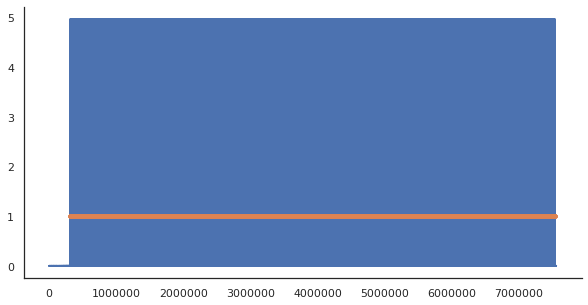

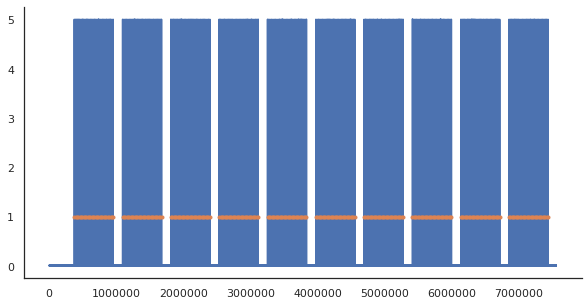

In [3]:
exp_obj = ao.alloptical(paths[0], stim='2pstim')
for key, values in vars(exp_obj).items():
    print(key)

exp_obj._parseNAPARMgpl()
exp_obj._parseNAPARMxml()
exp_obj._parsePVMetadata()
exp_obj.stimProcessing(stim_channel='markpoints2packio')

In [5]:
exp_obj._findTargets_naparm()
exp_obj.find_photostim_frames()
exp_obj.seizure_frames(bad_frames=list(range(5040,7560)))


print('Total photostim + seizure/CSD frames: ', len(exp_obj.bad_frames))
np.save('%s/bad_frames.npy' % tiffs_loc, exp_obj.bad_frames)   # save to npy file and remember to move npy file to tiff folder before running with suite2p

['FOVTargets_001_2020-03-18_find_resp_002.tif', 'FOVTargets_002_2020-03-18_find_resp_002.tif', 'FOVTargets_003_2020-03-18_find_resp_002.tif', 'FOVTargets_004_2020-03-18_find_resp_002.tif', 'FOVTargets_005_2020-03-18_find_resp_002.tif', 'FOVTargets_006_2020-03-18_find_resp_002.tif', 'FOVTargets_007_2020-03-18_find_resp_002.tif', 'FOVTargets_008_2020-03-18_find_resp_002.tif', 'FOVTargets_009_2020-03-18_find_resp_002.tif', 'FOVTargets_010_2020-03-18_find_resp_002.tif', 'FOVTargets_011_2020-03-18_find_resp_002.tif', 'FOVTargets_012_2020-03-18_find_resp_002.tif', 'FOVTargets_013_2020-03-18_find_resp_002.tif', 'FOVTargets_014_2020-03-18_find_resp_002.tif', 'FOVTargets_015_2020-03-18_find_resp_002.tif', 'FOVTargets_016_2020-03-18_find_resp_002.tif', 'FOVTargets_017_2020-03-18_find_resp_002.tif', 'FOVTargets_018_2020-03-18_find_resp_002.tif', 'FOVTargets_019_2020-03-18_find_resp_002.tif', 'FOVTargets_020_2020-03-18_find_resp_002.tif', 'FOVTargets_021_2020-03-18_find_resp_002.tif', 'FOVTargets_

In [6]:
len(exp_obj.target_areas)

30

In [7]:
### make a new tiff file (not for suite2p) with the first photostim frame whitened, and save new tiff
import tifffile as tf

tiff_path = tiffs_loc2
print(tiff_path)
im_stack = tf.imread(tiff_path, key=range(exp_obj.n_frames))
print('Processing naparm tiff of shape: ',im_stack.shape) 

frames_to_whiten = []
for j in exp_obj.stim_start_frames[0]:
        frames_to_whiten.append(j)

        
# numba of photostim frames with artifacts
frames_to_remove = []
for j in exp_obj.stim_start_frames[0]:
    for i in range(0, exp_obj.duration_frames+1): # usually need to remove 1 more frame than the stim duration, as the stim isn't perfectly aligned with the start of the imaging frame
        frames_to_remove.append(j+i)

print('# of total photostim artifact frames:',len(frames_to_remove))
        
    
# im_stack_1 = im_stack
# a = np.full_like(im_stack_1[0], fill_value=0)
# a[0:100,0:100] = 5000.
# for frame in frames_to_whiten:
# #     im_stack_1[frame-3] = im_stack_1[frame-3]+a
# #     im_stack_1[frame-2] = im_stack_1[frame-2]+a
#     im_stack_1[frame-1] = im_stack_1[frame-1]+a    
# print(im_stack_1.shape)

# im_stack_1 = np.delete(im_stack_1, exp_obj.photostim_frames, axis=0)
# print('After delete shape artifactrem',im_stack_1.shape)

# tf.imwrite("/home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_%s/2020-03-18_%s_artifactrem.tif" % (trial, trial),
#            im_stack_1, photometric='minisblack')

# del(im_stack_1)


# draw areas on top of im_stack_1 where targets are:
im_stack_2 = im_stack

for stim in range(exp_obj.n_groups):
    b = np.full_like(im_stack_2[0], fill_value=0)
    targets = exp_obj.target_areas[stim]
    for i in np.arange(len(targets)):
        for j in targets[i]:
            b[j]=5000
    
    all_stim_start_frames = []
    for stim_frame in exp_obj.stim_start_frames[0][stim::exp_obj.n_groups]:
        all_stim_start_frames.append(stim_frame)
    for frame in all_stim_start_frames:
#         im_stack_2[frame-4] = im_stack_2[frame-4]+b
#         im_stack_2[frame-3] = im_stack_2[frame-3]+b
#        im_stack_2[frame-2] = im_stack_2[frame-2]+b
        im_stack_2[frame-1] = im_stack_2[frame-1]+b  

        

im_stack_2 = np.delete(im_stack_2, exp_obj.photostim_frames, axis=0)


print('After delete shape targetcells',im_stack_2.shape)


tf.imwrite("/home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_%s/2020-03-18_%s_targetcells.tif" % (trial, trial),
           im_stack_2, photometric='minisblack')

print('done saving to: ', "/home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_%s/2020-03-18_%s_targetcells.tif" % (trial, trial))

del(im_stack_2)
del(im_stack)

/home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_t-017/2020-03-18_J063_t-017_Cycle00001_Ch3.tif
Processing naparm tiff of shape:  (10705, 512, 512)
# of total photostim artifact frames: 2700
After delete shape targetcells (8005, 512, 512)
done saving to:  /home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_t-017/2020-03-18_t-017_targetcells.tif


## Save exp_obj as pkl

In [34]:
## save exp_obj as pickle
import pickle
# Pickle the expobject output to save it for analysis
pkl_path = '%s/2020-03-18_%s.pkl' % (tiffs_loc, trial)
with open(pkl_path, 'wb') as f:
        pickle.dump(exp_obj, f)
print("Pkl saved to %s" % pkl_path)

Pkl saved to /home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_t-017/2020-03-18_t-017.pkl


## Run suite2p

In [22]:
# tiffs to run s2p on
to_suite2p = ['t-017']

to_suite2p_tiffs = []
for i in to_suite2p:
    to_suite2p_tiffs.append('/home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_%s/2020-03-18_J063_%s_Cycle00001_Ch3.tif' % (i,i))

In [23]:
import os

data_path = []
for i in to_suite2p:
    data_path.append('/home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_%s/' % i)

tiff_list = to_suite2p_tiffs

# setup settings and run suite2p
from suite2p.run_s2p import run_s2p

ops = {
        'batch_size': 2000, # reduce if running out of RAM
        'fast_disk': os.path.expanduser('~/Documents/suite2p_binaries'), # used to store temporary binary file, defaults to save_path0 (set as a string NOT a list)
         #'save_path0': '/media/jamesrowland/DATA/plab/suite_2p', # stores results, defaults to first item in data_path
        'delete_bin': True, # whether to delete binary file after processing
        # main settings
        'nplanes' : 1, # each tiff has these many planes in sequence
        'nchannels' : 1, # each tiff has these many channels per plane
        'functional_chan' : 1, # this channel is used to extract functional ROIs (1-based)
        'diameter': 5.5, # this is the main parameter for cell detection, 2-dimensional if Y and X are different (e.g. [6 12])
        'tau':  1.26, # this is the main parameter for deconvolution (1.25-1.5 for gcamp6s)
        'fs': 30.,  # sampling rate (total across planes)
        # output settings
        'save_mat': True, # whether to save output as matlab files
        'combined': True, # combine multiple planes into a single result /single canvas for GUI
        # parallel settings
        'num_workers': 50, # 0 to select num_cores, -1 to disable parallelism, N to enforce value
        'num_workers_roi': 50, # 0 to select number of planes, -1 to disable parallelism, N to enforce value
        # registration settings
        'do_registration': True, # whether to register data
        'nimg_init': 200, # subsampled frames for finding reference image
        'maxregshift': 0.1, # max allowed registration shift, as a fraction of frame max(width and height)
        'align_by_chan' : 1, # when multi-channel, you can align by non-functional channel (1-based)
        'reg_tif': False, # whether to save registered tiffs
        'subpixel' : 10, # precision of subpixel registration (1/subpixel steps)
        #'two_step_registration': True,
        #'keep_movie_raw': True,
        # cell detection settings
        'connected': True, # whether or not to keep ROIs fully connected (set to 0 for dendrites)
        'navg_frames_svd': 5000, # max number of binned frames for the SVD
        'nsvd_for_roi': 1000, # max number of SVD components to keep for ROI detection
        'max_iterations': 20, # maximum number of iterations to do cell detection
        'ratio_neuropil': 6., # ratio between neuropil basis size and cell radius
        'ratio_neuropil_to_cell': 3, # minimum ratio between neuropil radius and cell radius
        'tile_factor': 1., # use finer (>1) or coarser (<1) tiles for neuropil estimation during cell detection
        'threshold_scaling': 1., # adjust the automatically determined threshold by this scalar multiplier
        'max_overlap': 0.75, # cells with more overlap than this get removed during triage, before refinement
        'inner_neuropil_radius': 2, # number of pixels to keep between ROI and neuropil donut
        'outer_neuropil_radius': np.inf, # maximum neuropil radius
        'min_neuropil_pixels': 350, # minimum number of pixels in the neuropil
        # deconvolution settings
        'baseline': 'maximin', # baselining mode
        'win_baseline': 60., # window for maximin
        'sig_baseline': 10., # smoothing constant for gaussian filter
        'prctile_baseline': 8.,# optional (whether to use a percentile baseline)
        'neucoeff': .7,  # neuropil coefficient
      }

# make the local suite2p binaries file if it does not already exist
if not os.path.exists(ops['fast_disk']):
    os.mkdir(ops['fast_disk'])
    
# name of the folder to save results in (default = suite2p in data_path)
save_folder = os.path.join('/home/pshah/mnt/qnap/Data/2020-03-18/J063/', 'suite2p/find_resp-4ap-t017')  


diameter = 5  # the average diameter (in pixels) of a cell -- check in fiji
fs = 30  # sampling rate of imaging (default 30 fps)
nplanes = 1  # number of planes (default 1)
nchannels = 1 # number of channels aquired (default 1)  

db = {
     'data_path': data_path,
     'tiff_list': tiff_list, 
     'diameter': diameter, 
     'fs': fs,
     'nplanes': nplanes,
     'nchannels': nchannels,
     'save_folder': save_folder
     }

In [24]:
import time as time
# run suite2p
t1 = time.time()
opsEnd=run_s2p(ops=ops,db=db)
t2 = time.time()
print('Total time this cell was running is {}'.format(t2-t1))

%reset -f

{'data_path': ['/home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_t-017/'], 'tiff_list': ['/home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_t-017/2020-03-18_J063_t-017_Cycle00001_Ch3.tif'], 'diameter': 5, 'fs': 30, 'nplanes': 1, 'nchannels': 1, 'save_folder': '/home/pshah/mnt/qnap/Data/2020-03-18/J063/suite2p/find_resp-4ap-t017'}
tif
** Found 1 tifs - converting to binary **
8000 frames of binary, time 260.64 sec.
time 320.08 sec. Wrote tifs to binaries for 1 planes
>>>>>>>>>>>>>>>>>>>>> PLANE 0 <<<<<<<<<<<<<<<<<<<<<<
----------- REGISTRATION
registering 10705 frames
Reference frame, 5.52 sec.
10000/10705 frames, 149.20 sec.
10705/10705 frames, 159.66 sec.
bad frames file path: /home/pshah/mnt/qnap/Data/2020-03-18/J063/2020-03-18_J063_t-017/bad_frames.npy
number of badframes: 4617
----------- Total 165.77 sec
Registration metrics, 25.34 sec.
----------- ROI DETECTION AND EXTRACTION
Binning movie in chunks of length 38
Binned movie [152,507,509], 6.00 sec.
NOTE: estimat

/home/pshah/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


After removing overlaps, 1789 ROIs remain
Masks made in 22.25 sec.
Extracted fluorescence from 1789 ROIs in 10705 frames, 33.64 sec.
----------- Total 86.38 sec.
----------- SPIKE DECONVOLUTION
----------- Total 45.21 sec.
Plane 0 processed in 326.17 sec (can open in GUI).
total = 160.40 sec.
TOTAL RUNTIME 161.05 sec
Total time this cell was running is 646.9133682250977


In [11]:
### make a new tiff file (not for suite2p) with the first photostim frame whitened, and save new tiff
import tifffile as tf

frames_to_remove = []
for j in exp_obj.stim_start_frames[0]:
    for i in range(0, exp_obj.duration_frames+1): # usually need to remove 1 more frame than the stim duration, as the stim isn't perfectly aligned with the start of the imaging frame
        frames_to_remove.append(j+i)

tiff_path = tiffs_loc2
# tiff_path = '/home/pshah/mnt/qnap/Data/2020-03-19/photostim/2020-03-19_find_resp_001/Targets/FOVTargets_024_2020-03-19_find_resp_001.tif'
# im_stack = tf.imread(tiff_path); print(im_stack.shape)
print(tiff_path)
im_stack = tf.imread(tiff_path, key=range(exp_obj.n_frames)); print(im_stack.shape)
im_stack_2 = im_stack

/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_t-012/2020-03-19_t-012_Cycle00001_Ch3.tif
(5259, 1024, 1024)


In [20]:
print(len(exp_obj.stim_start_frames[0][26::33]))
stim = 5
all_stim_start_frames = []
for stim_frame in exp_obj.stim_start_frames[0][stim::exp_obj.n_groups]:
    all_stim_start_frames.append(stim_frame)

len(exp_obj.target_coords[stim])
# exp_obj.target_areas[stim][0]
# targets = np.floor_divide(exp_obj.target_areas[stim], 2)
# targets

b = np.full_like(im_stack_2[0], fill_value=0)
targets = exp_obj.target_areas[stim]; len(targets)
#b[[*targets[0]]]=5000
for i in np.arange(len(targets)):
    for j in targets[i]:
        b[j]=5000


10


In [13]:
stim=6
len(exp_obj.target_areas[stim])

20

In [1]:
b = np.full_like(exp_obj.frame_x, fill_value=0)
for stim in range(exp_obj.n_groups):
    #targets = np.floor_divide(exp_obj.target_areas[stim], 2)
    targets = exp_obj.target_areas[stim]
    for i in np.arange(len(targets)):
        for j in targets[i]:
            b[j]=5000
b.shape()

NameError: name 'np' is not defined

In [15]:
exp_obj.frame_x/512

2.0

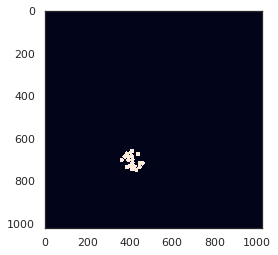

In [18]:
import matplotlib.pyplot as plt
plt.imshow(b); plt.show()

In [24]:
exp_obj.target_coords[23]

[(434.0, 594.0),
 (440.0, 566.0),
 (440.0, 624.0),
 (442.0, 606.0),
 (444.0, 580.0),
 (448.0, 634.0),
 (452.0, 598.0),
 (460.0, 560.0),
 (460.0, 626.0),
 (466.0, 650.0),
 (468.0, 580.0),
 (468.0, 612.0),
 (470.0, 590.0),
 (476.0, 626.0),
 (478.0, 572.0),
 (486.0, 620.0),
 (488.0, 654.0),
 (502.0, 546.0),
 (514.0, 578.0),
 (518.0, 624.0),
 (518.0, 662.0),
 (522.0, 678.0),
 (534.0, 666.0),
 (542.0, 602.0),
 (546.0, 620.0)]

In [28]:
### make a new tiff file (not for suite2p) with the first photostim frame whitened, and save new tiff
import tifffile as tf

tiff_path = tiffs_loc2
print(tiff_path)
im_stack = tf.imread(tiff_path, key=range(exp_obj.n_frames))

print('Processing naparm tiff of shape: ',im_stack.shape) 
# draw areas on top of im_stack_1 where targets are:
im_stack_2 = im_stack

for stim in range(exp_obj.n_groups):
    b = np.full_like(im_stack_2[0], fill_value=0)
    targets = exp_obj.target_areas[stim]
    for i in np.arange(len(targets)):
        for j in targets[i]:
            b[j]=5000
    
    all_stim_start_frames = []
    for stim_frame in exp_obj.stim_start_frames[0][stim::exp_obj.n_groups]:
        all_stim_start_frames.append(stim_frame)
    for frame in all_stim_start_frames:
#         im_stack_2[frame-4] = im_stack_2[frame-4]+b
#         im_stack_2[frame-3] = im_stack_2[frame-3]+b
#        im_stack_2[frame-2] = im_stack_2[frame-2]+b
        im_stack_2[frame-1] = im_stack_2[frame-1]+b  

        

im_stack_2 = np.delete(im_stack_2, exp_obj.photostim_frames, axis=0)


print('After delete shape targetcells',im_stack_2.shape)


tf.imwrite("/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_%s/2020-03-19_%s_targetcells.tif" % (trial, trial),
           im_stack_2, photometric='minisblack')

print('done saving')

del(im_stack_2)
del(im_stack)



/home/pshah/mnt/qnap/Data/2020-03-19/2020-03-19_t-002/2020-03-19_t-002_Cycle00001_Ch3.tif
Processing naparm tiff of shape:  (4357, 1024, 1024)
After delete shape targetcells (3007, 1024, 1024)
done saving
